<a href="https://colab.research.google.com/github/CM-007/DS_ASS/blob/main/Assignment_18_Forecasting_(CocaCola_Sales_Rawdata).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ACF and PACF**

# **Import Libraries**

In [117]:
# ACF and PACF
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

# **Load Data Set**

In [118]:
data = pd.read_excel('/content/CocaCola_Sales_Rawdata.xlsx',index_col='Quarter',parse_dates=True)

# **EDA**

In [119]:
data

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


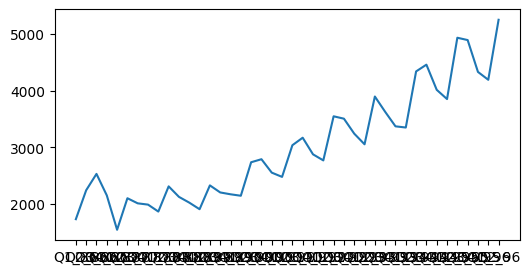

In [120]:
plt.figure(figsize=(6,3))
plt.plot(data)

# **First-order diffrence**

In [121]:
data['Sales_Diff'] = data['Sales'].diff(periods=1)

In [122]:
data

,Sales,Sales_Diff
Quarter,,
Q1_86,1734.827000,NaN
Q2_86,2244.960999,510.133999
Q3_86,2533.804993,288.843994
Q4_86,2154.962997,-378.841995
Q1_87,1547.818996,-607.144001
Q2_87,2104.411995,556.592999
Q3_87,2014.362999,-90.048996
Q4_87,1991.746998,-22.616001
Q1_88,1869.049999,-122.696999


## **Remove null values**

In [123]:
data = data.dropna()
data

,Sales,Sales_Diff
Quarter,,
Q2_86,2244.960999,510.133999
Q3_86,2533.804993,288.843994
Q4_86,2154.962997,-378.841995
Q1_87,1547.818996,-607.144001
Q2_87,2104.411995,556.592999
Q3_87,2014.362999,-90.048996
Q4_87,1991.746998,-22.616001
Q1_88,1869.049999,-122.696999
Q2_88,2313.631996,444.581997


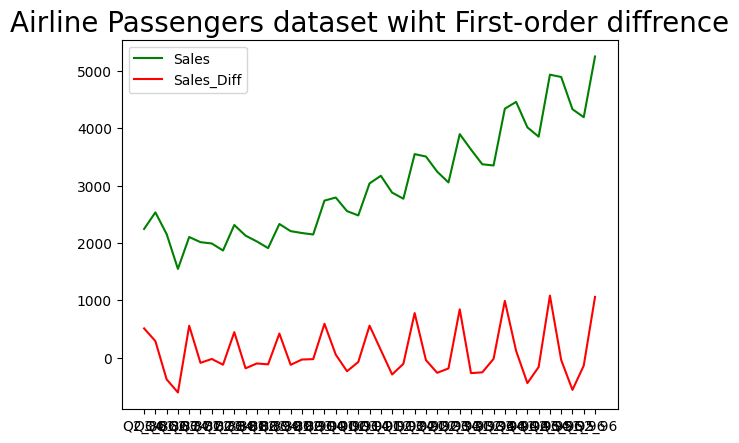

In [124]:
plt.title('Airline Passengers dataset wiht First-order diffrence',size=20)
plt.plot(data['Sales'],label='Sales',color='green')
plt.plot(data['Sales_Diff'],label='Sales_Diff',color='red')
plt.legend()

# **Calculate Autocorrelation**

### **ACF - Auto correlation function**

In [125]:
acf = acf(data['Sales_Diff'])
np.round(acf,2)

array([ 1.  , -0.13, -0.58, -0.14,  0.77, -0.15, -0.45, -0.09,  0.64,
       -0.11, -0.37, -0.09,  0.54, -0.14, -0.34, -0.04,  0.48])

## **ACF Plot**

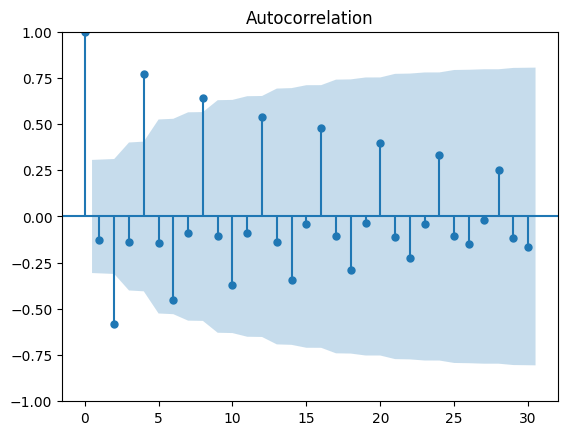

In [126]:
plot_acf(data['Sales_Diff'],lags=30);

# **Calculate PACF**
Partial Auto Correlation Function

In [127]:
pacf = pacf(data['Sales_Diff'])
np.round(pacf,2)

array([ 1.  , -0.13, -0.64, -0.63,  0.59, -0.4 ,  0.1 , -0.08,  0.18,
        0.21, -0.01,  0.06,  0.3 , -0.48, -0.13,  0.02, -0.29])

# **Plot PACF**

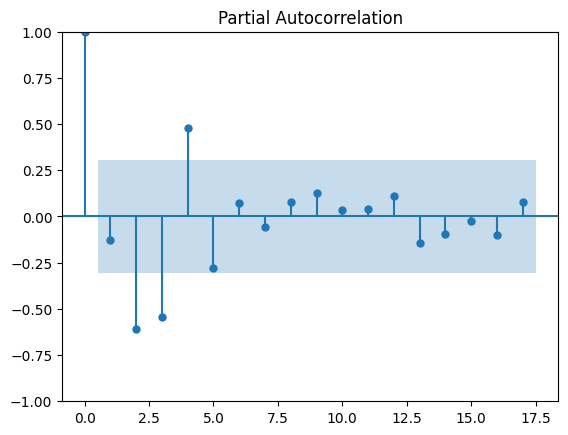

In [128]:
plot_pacf(data['Sales_Diff']);

# **Model Based Methods**

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
data = pd.read_excel('/content/CocaCola_Sales_Rawdata.xlsx')

In [131]:
data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [132]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,42.0,2994.353308,977.930896,1547.818996,2159.714247,2782.376999,3609.25,5253.0


# **Data Pre-processing**

# **Get dummies column**

In [133]:
data = pd.get_dummies(data, columns = ['Quarter'])
data.head()

,Sales,Quarter_Q1_86,Quarter_Q1_87,Quarter_Q1_88,Quarter_Q1_89,Quarter_Q1_90,Quarter_Q1_91,Quarter_Q1_92,Quarter_Q1_93,Quarter_Q1_94,...,Quarter_Q4_86,Quarter_Q4_87,Quarter_Q4_88,Quarter_Q4_89,Quarter_Q4_90,Quarter_Q4_91,Quarter_Q4_92,Quarter_Q4_93,Quarter_Q4_94,Quarter_Q4_95
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2244.960999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2533.804993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2154.962997,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1547.818996,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
data.shape

(42, 43)

# **Set Columns**

In [135]:
data.columns = ['Sales','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4']
data.head()

,Sales,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,...,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2244.960999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2533.804993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2154.962997,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1547.818996,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
# set t values
data['t']=np.arange(1,43)

In [137]:
# set t squared value
data['t_sq'] = data['t']*data['t']

In [138]:
# set log Sales values
data['log_Sales'] = np.log(data['Sales'])

In [139]:
data.head(2)

,Sales,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,...,Q4,Q4,Q4,Q4,Q4,Q4,Q4,t,t_sq,log_Sales
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,7.458663
1,2244.960999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,4,7.716443


# **Data Splitting**

In [140]:
train = data.iloc[:-15]
test = data.iloc[-15:]

In [141]:
from sklearn.metrics import mean_squared_error

# **Linear Model**

In [142]:
import statsmodels.formula.api as smf

In [143]:
linear_model = smf.ols('Sales~t',data=train).fit() #Passengers - target col, t - independent variable
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test['t']))) # get prediction for test data
rmse_linear = np.sqrt(mean_squared_error(test['Sales'],pred_linear)) # there is no direct built in function for rmst so take sqrt of MSE
rmse_linear # RMSE should be minimum. try all models. Whichever model will give you min, RMSE that will be our final model

743.879730221114

# **Exponential Model**

In [144]:
exp = smf.ols('log_Sales~t',data=train).fit()
pred_exp = pd.Series(exp.predict(pd.DataFrame(test['t']))) # get prediction for test data
rmse_exp = np.sqrt(mean_squared_error(test['log_Sales'],pred_exp)) # there is no direct built in function for rmst so take sqrt of MSE
rmse_exp

0.13896035312635557

# **Quadratic Model**

In [145]:
quad = smf.ols('Sales~t+t_sq',data=train).fit()
pred_quad = pd.Series(quad.predict(pd.DataFrame(test[['t','t_sq']])))
rmse_quad = np.sqrt(mean_squared_error(test['Sales'],pred_quad))
rmse_quad


983.9814363887531

# **Additive Seasonality Model - Pass from Jan to Nov**

In [146]:
add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(pd.DataFrame(test[['Q1','Q2','Q3','Q4']])))
rmse_add_sea = np.sqrt(mean_squared_error(test['Sales'],pred_add_sea))
rmse_add_sea

1850.8893463533295

# **Additive Seasonality Quadratic Model**

In [147]:
add_sea_quad = smf.ols('Sales~t+t_sq+Q1+Q2+Q3+Q4',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_quad.predict(pd.DataFrame(test[['t','t_sq','Q1','Q2','Q3','Q4']])))
rmse_add_sea_quad = np.sqrt(mean_squared_error(test['Sales'],pred_add_sea_quad))
rmse_add_sea_quad

384.52069793155584

# **Multiplicative Seasonality**

In [148]:
mul_sea = smf.ols('log_Sales~Q1+Q2+Q3+Q4',data=train).fit()
pred_mul_sea = pd.Series(mul_sea.predict(test[['Q1','Q2','Q3','Q4']]))
rmse_mul_sea = np.sqrt(mean_squared_error(test['log_Sales'],pred_mul_sea))
rmse_mul_sea

0.8237707721179124

# **Compare the results**

In [149]:
data = {"MODEL":pd.Series(['Linear','Exponential','Quadratic','Additive Seas','Additive Seas Quad','Multiplicative Seas']),
        "RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mul_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(["RMSE_Values"])

,MODEL,RMSE_Values
1,Exponential,0.138960
5,Multiplicative Seas,0.823771
4,Additive Seas Quad,384.520698
0,Linear,743.879730
2,Quadratic,983.981436
3,Additive Seas,1850.889346


# *We Found Exponential Model is the best model*